# Allen Mouse connectivity Atlas


In [1]:
import sys
import numpy as np
import time
import pickle
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [2]:
import allensdk

In [3]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

projection density = sum of detected pixels / sum of all pixels in division  
projection energy = sum of detected pixel intensity / sum of all pixels in division  
injection_fraction = fraction of pixels belonging to manually annotated injection site  
injection_density = density of detected pixels within the manually annotated injection site  
injection_energy = energy of detected pixels within the manually annotated injection site  
data_mask = binary mask indicating if a voxel contains valid data (0=invalid, 1=valid). Only valid voxels should be used for analysis  

projection density = sum of detected pixels / sum of all pixels in division  
projection intensity = sum of detected pixel intensity / sum of detected pixels  
projection energy = projection intensity * projection density  

# Experiment list

Want a list of all (grey and retina as well) experiment lists of the mouse connectivity cache

In [4]:
#create an instant called mcc that contains attributes in the manifest file
mcc=MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')

#And get all experiment lists
all_experiments = mcc.get_experiments(dataframe=False)

each experiment contains useful informations:

In [5]:
#print a sample of an experiment
all_experiments[0]

{u'gender': u'M',
 u'id': 180435652,
 u'injection-coordinates': [7820, 4250, 9870],
 u'injection-structures': [{u'abbreviation': u'TEa',
   u'color': u'15B0B3',
   u'id': 541,
   u'name': u'Temporal association areas'},
  {u'abbreviation': u'ECT',
   u'color': u'0D9F91',
   u'id': 895,
   u'name': u'Ectorhinal area'},
  {u'abbreviation': u'PERI',
   u'color': u'0E9684',
   u'id': 922,
   u'name': u'Perirhinal area'},
  {u'abbreviation': u'AUDv',
   u'color': u'019399',
   u'id': 1018,
   u'name': u'Ventral auditory area'}],
 u'product-id': 5,
 u'strain': u'C57BL/6J',
 u'structure-abbrev': u'ECT',
 u'structure-color': u'0D9F91',
 u'structure-id': 895,
 u'structure-name': u'Ectorhinal area',
 u'transgenic-line': u''}

Want to create a list of experiment id s

In [6]:
all_experiments_id_list=[]
for i in all_experiments:
    all_experiments_id_list.append(i['id'])

In [7]:
all_experiments_id_list

[180435652,
 180436360,
 167902586,
 166055636,
 180719293,
 180709942,
 180917660,
 174957972,
 480074702,
 158257355,
 180916954,
 100141780,
 158258062,
 166082128,
 166153483,
 158314987,
 267959197,
 180720175,
 478376197,
 113144533,
 114155190,
 180717881,
 165975096,
 301267162,
 313325371,
 120814821,
 181057754,
 127084296,
 112306316,
 286482701,
 478874530,
 263106036,
 181895006,
 180709230,
 114472145,
 180074890,
 112952510,
 263242463,
 278510903,
 267540168,
 158374671,
 267538735,
 112596790,
 181598954,
 266176167,
 263785543,
 112951804,
 141603190,
 264319363,
 168162771,
 175019536,
 127867804,
 232311959,
 181058463,
 287995889,
 180718587,
 479673174,
 180674463,
 142654100,
 267703239,
 266174751,
 174583187,
 304617742,
 113036264,
 478095541,
 268076421,
 100141796,
 113935990,
 480703321,
 299783689,
 112514915,
 100141597,
 146593590,
 298601161,
 176886238,
 159024474,
 513775257,
 288169135,
 125833030,
 175018829,
 478491090,
 305618479,
 176886958,
 180

# Download annotation volume

if file already exists, it simply imports it instead of downloading

In [8]:
annt=mcc.get_annotation_volume()[0]

# Structure_tree

Make structure_tree instance.

In [9]:
structure_tree=mcc.get_structure_tree()

Structure_tree can be used to fetch properties of a list of structures. For example,

In [10]:
structure=structure_tree.get_structures_by_name(['Thalamus','Hypothalamus'])
structure

[{u'acronym': u'TH',
  u'color_hex_triplet': [255, 112, 128],
  u'graph_id': 1,
  u'graph_order': 641,
  u'id': 549,
  u'name': u'Thalamus',
  u'structure_id_path': [997, 8, 343, 1129, 549],
  u'structure_set_ids': [2,
   112905828,
   12,
   184527634,
   112905813,
   114512891,
   114512892]},
 {u'acronym': u'HY',
  u'color_hex_triplet': [230, 68, 56],
  u'graph_id': 1,
  u'graph_order': 715,
  u'id': 1097,
  u'name': u'Hypothalamus',
  u'structure_id_path': [997, 8, 343, 1129, 1097],
  u'structure_set_ids': [2,
   112905828,
   12,
   184527634,
   112905813,
   114512891,
   114512892]}]

# Ontologies

Ontolgy is a naming and definitions of types, properties of the given domain

first, make oapi_inst instance

In [11]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi_inst=OntologiesApi()

create structure_set_ids. structure_set_ids is a list of id that can be used to filter out a list of structures that belong to specific category of structures (below).

In [12]:
structure_set_ids=structure_tree.get_structure_sets()

#print all the id
structure_set_ids

{2,
 3,
 10,
 12,
 112905813,
 112905828,
 114512891,
 114512892,
 167587189,
 184527634,
 396673091,
 514166994}

To see what each id entails, see the description of each ids below:

In [13]:
oapi_structure_set=oapi_inst.get_structure_sets(structure_set_ids)
oapi_id_list=[]
for i in oapi_structure_set:
    print(i['id'])
    print ""
    print(i)
    oapi_id_list.append(i['id'])
    print("")

114512892

{u'description': u'List of Primary injection structures for BDA/AAV injection structure search', u'name': u'Mouse Connectivity - BDA/AAV Primary Injection Structures', u'id': 114512892}

112905813

{u'description': u'List of primary AND secondary injection structures for BDA/AAV injection structure search', u'name': u'Mouse Connectivity - BDA/AAV All Injection Structures', u'id': 112905813}

10

{u'description': u'List of structures for ABA Fine Structure Search', u'name': u'ABA - Fine Structure Search', u'id': 10}

167587189

{u'description': u'List of structures used for the Connectivity projection experiment page', u'name': u'Mouse Connectivity - Summary', u'id': 167587189}

112905828

{u'description': u'List of primary AND secondary injection structures for Projection injection structure search', u'name': u'Mouse Connectivity - Projection All Injection Structures', u'id': 112905828}

396673091

{u'description': u'All mouse visual areas with layers', u'name': u'Mouse Cell

### Exactly how many experiments are contained in each?

furthermore, how many overlap between each?

In [14]:
ddict={}
for i in structure_set_ids:
    ddict[i]=structure_tree.get_structures_by_set_id([i])

In [15]:
print "structure set id, number of experiments"

for i in ddict:
    print(i,len(ddict[i]))

structure set id, number of experiments
(2, 12)
(3, 51)
(112905828, 379)
(10, 74)
(12, 843)
(184527634, 729)
(514166994, 6)
(396673091, 70)
(167587189, 293)
(114512891, 300)
(114512892, 79)
(112905813, 111)


In [16]:
%pprint

Pretty printing has been turned OFF


In [17]:
#set of structure ids in structure_set_ids
id_in_structure_set_ids={}
ind=id_in_structure_set_ids

for i in ddict:
    ind[i]=[]
    
for i in ddict:
    for j in ddict[i]:
        ind[i].append(j['id'])

for example, for id=2,

In [18]:
ind[2]

[313, 315, 354, 477, 512, 549, 698, 703, 771, 803, 1089, 1097]

find intersection between each id with their keys being string addition and symmetric $f(23)=f(32)$

In [19]:
cross_dict={}
for i in structure_set_ids:
    for j in structure_set_ids:
        cross_dict[str(i)+str(j)]=[]

for i in ind:
    for j in ind:
        for k in ind[i]:
            if k in ind[j]:
                cross_dict[str(i)+str(j)].append(k)


In [20]:
for i in cross_dict:
    print(i,cross_dict[i])

('212', [313, 315, 354, 477, 512, 549, 698, 703, 771, 803, 1089, 1097])
('210', [])
('3966730912', [])
('3966730913', [])
('396673091514166994', [385, 394, 402, 409, 417, 533])
('112905828112905813', [4, 7, 8, 22, 128, 135, 136, 138, 155, 159, 170, 184, 194, 214, 215, 218, 239, 242, 250, 254, 258, 275, 278, 290, 294, 302, 310, 313, 315, 322, 323, 329, 339, 342, 343, 348, 354, 361, 370, 374, 375, 381, 382, 385, 395, 453, 463, 477, 485, 500, 502, 512, 528, 533, 534, 536, 549, 564, 567, 581, 623, 629, 637, 645, 669, 672, 685, 688, 695, 698, 726, 733, 771, 797, 803, 818, 822, 826, 835, 856, 864, 867, 894, 904, 920, 928, 961, 984, 985, 987, 1008, 1020, 1022, 1029, 1031, 1048, 1065, 1080, 1089, 1091, 1093, 1097, 1100, 1107, 1129, 1132, 709])
('114512891396673091', [385, 394, 402, 409, 417, 425, 533, 312782546, 312782574, 312782628])
('167587189396673091', [385, 394, 402, 409, 417, 425, 533, 312782546, 312782574, 312782628])
('22', [313, 315, 354, 477, 512, 549, 698, 703, 771, 803, 1089, 1097

In [21]:
sum(len(ddict[i]) for i in ddict)

2947

# print full function

In [22]:
def print_full(x):
    """print the pandas dataframe into raw data
    args:
        x(pandas data): """
    pd.set_option('display.max_rows',len(x))
    print(x)
    pd.reset_option('display.max_rows')

# Summary structures (pandas)

Use all the structure ids from the structure_id_set of ontology to generate complete list of structures. First, here's a list of paths

In [23]:
summary_structures=structure_tree.get_structures_by_set_id(oapi_id_list)
for i in summary_structures:
    print i['structure_id_path']

[997, 8, 343, 1129, 1097, 467, 331, 557, 1]
[997, 8, 567, 688, 695, 315, 453, 322, 345, 2]
[997, 8, 343, 313, 339, 4]
[997, 1009, 983, 784, 6]
[997, 8, 343, 1065, 771, 1132, 7]
[997, 8]
[997, 8, 567, 688, 695, 315, 453, 322, 361, 9]
[997, 8, 343, 313, 323, 294, 10]
[997, 8, 343, 313, 348, 165, 12]
[997, 1009, 983, 896, 14]
[997, 8, 343, 1129, 549, 856, 571, 15]
[997, 8, 567, 688, 703, 16]
[997, 8, 343, 313, 323, 294, 17]
[997, 8, 567, 688, 695, 1089, 1080, 19]
[997, 8, 567, 688, 695, 1089, 822, 909, 918, 20]
[997, 1009, 967, 840, 21]
[997, 8, 567, 688, 695, 315, 22]
[997, 8, 567, 623, 477, 278, 23]
[997, 8, 343, 313, 323, 294, 26]
[997, 8, 343, 1129, 549, 856, 1014, 27]
[997, 8, 567, 688, 695, 1089, 822, 909, 918, 28]
[997, 8, 343, 1129, 1097, 157, 30]
[997, 8, 567, 688, 695, 315, 31]
[997, 8, 567, 688, 695, 315, 669, 385, 33]
[997, 8, 343, 313, 323, 35]
[997, 8, 567, 688, 695, 315, 1057, 36]
[997, 8, 343, 1129, 1097, 157, 38]
[997, 8, 567, 688, 695, 315, 31, 39]
[997, 8, 567, 688, 695

and all the ids

In [24]:
structure_id_list=[]
for i in summary_structures:
    structure_id_list.append(i['id'])
structure_id_list.append(997) # the whole brain
structure_id_list.append(0) # not a region

In [25]:
structure_id_list

[1, 2, 4, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 30, 31, 33, 35, 36, 38, 39, 41, 42, 44, 45, 46, 48, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 71, 72, 74, 77, 78, 79, 82, 83, 84, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 108, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 141, 143, 146, 707, 148, 149, 151, 154, 155, 156, 157, 158, 159, 160, 162, 163, 165, 167, 169, 170, 171, 173, 175, 177, 178, 180, 181, 183, 184, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 206, 207, 209, 210, 211, 212, 214, 215, 216, 217, 218, 220, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 262, 263, 266, 267, 268, 269, 271, 272, 274, 275, 276, 278, 279, 280, 281, 284, 28

structure ids that are present in the annotation voolume:

In [26]:
annt.shape

(528L, 320L, 456L)

In [27]:
def gen(annt):
    for i in range(528):
        for j in range(320):
            for k in range(456):
                yield annt[i,j,k]
tlist=[]
for i in gen(annt):
    if i not in tlist:
        tlist.append(i)

with length:

In [28]:
len(tlist)

589

these id are obtained from the annotation volume. some of these are not present in the structure_id_list

In [29]:
for i in tlist:
    if i not in structure_id_list:
        print(i)

81
73
140
145
153
164


where do they come from?

# My Structure Tree

There is a need to create a dictionary correlating superstructures to its substructures.

This is done by creating MST, with each key paired with its direct (only one level below) substructures

In [90]:
MST={}
MST[997]=[]
for i in acronym_list:
    MST[acronym_to_id[i]]=[]

exception_id=[]
for i in summary_structures:
    sip=i['structure_id_path']
    
    
    try:
        MST[sip[-2]].append(sip[-1])
    except:
        exception_id.append((sip[-2],sip[-1]))
MST[0]=[]

The following do not have structural information from the summary structures:

In [91]:
exception_id

[(81, 98), (81, 108), (73, 129)]

In [92]:
for i in [81,98,81,108,73,129]:
    try:
        id_to_acronym[i]
    except:
        print(i)

81
81
73


In [93]:
ind[2]

[313, 315, 354, 477, 512, 549, 698, 703, 771, 803, 1089, 1097]

In [94]:
for i in ind:
    for j in [81,98,81,108,73,129]:
        if j in ind[i]:
            print(j,i)

(98, 10)
(108, 10)
(129, 10)


In [95]:
structure_id_list_exception=[81,73]

81=lateral ventricles

In [96]:
MST

{0: [], 1: [], 2: [], 4: [811, 820, 828], 6: [], 7: [], 8: [343, 512, 567], 9: [], 10: [494, 503, 511], 12: [], 14: [], 15: [], 16: [], 17: [], 19: [], 20: [], 21: [665], 22: [241, 308, 340, 417, 532, 635, 683, 312782546], 23: [], 26: [], 27: [], 28: [], 30: [], 31: [39, 48], 33: [], 35: [], 36: [], 38: [71, 94], 39: [211, 919, 927, 935, 1015], 41: [], 42: [], 44: [707, 556, 747, 827, 1054, 1081], 45: [], 46: [673, 681, 690, 753], 48: [296, 588, 772, 810, 819], 50: [], 51: [189, 575, 599, 907, 930], 52: [], 53: [], 55: [], 56: [], 59: [], 60: [], 61: [], 62: [], 63: [455], 64: [], 66: [], 67: [], 68: [], 69: [], 71: [79, 103], 72: [], 74: [], 77: [], 78: [], 79: [], 10707: [], 82: [], 83: [], 84: [], 87: [], 88: [700, 708, 724], 90: [], 91: [], 92: [], 93: [], 94: [55, 87, 110], 95: [104, 111, 119], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 103: [652], 104: [328, 783, 831, 996, 1101], 105: [], 106: [], 108: [], 110: [], 111: [120, 163, 314, 344, 355], 112: [], 113: [], 114: [],

### No overlap (indirect confirmation)
making sure no duplicates are created in the MST

number wanted= len(MST) - 997 (top of chain) - 3 exceptions = 972

In [97]:
k=0
for i in MST:
    k+=len(MST[i])
k

972

In [98]:
MST

{0: [], 1: [], 2: [], 4: [811, 820, 828], 6: [], 7: [], 8: [343, 512, 567], 9: [], 10: [494, 503, 511], 12: [], 14: [], 15: [], 16: [], 17: [], 19: [], 20: [], 21: [665], 22: [241, 308, 340, 417, 532, 635, 683, 312782546], 23: [], 26: [], 27: [], 28: [], 30: [], 31: [39, 48], 33: [], 35: [], 36: [], 38: [71, 94], 39: [211, 919, 927, 935, 1015], 41: [], 42: [], 44: [707, 556, 747, 827, 1054, 1081], 45: [], 46: [673, 681, 690, 753], 48: [296, 588, 772, 810, 819], 50: [], 51: [189, 575, 599, 907, 930], 52: [], 53: [], 55: [], 56: [], 59: [], 60: [], 61: [], 62: [], 63: [455], 64: [], 66: [], 67: [], 68: [], 69: [], 71: [79, 103], 72: [], 74: [], 77: [], 78: [], 79: [], 10707: [], 82: [], 83: [], 84: [], 87: [], 88: [700, 708, 724], 90: [], 91: [], 92: [], 93: [], 94: [55, 87, 110], 95: [104, 111, 119], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 103: [652], 104: [328, 783, 831, 996, 1101], 105: [], 106: [], 108: [], 110: [], 111: [120, 163, 314, 344, 355], 112: [], 113: [], 114: [],

# Unpack MST (run Maps first)

There is a need to list out all the substructures of a given structure

In [99]:
MST

{0: [], 1: [], 2: [], 4: [811, 820, 828], 6: [], 7: [], 8: [343, 512, 567], 9: [], 10: [494, 503, 511], 12: [], 14: [], 15: [], 16: [], 17: [], 19: [], 20: [], 21: [665], 22: [241, 308, 340, 417, 532, 635, 683, 312782546], 23: [], 26: [], 27: [], 28: [], 30: [], 31: [39, 48], 33: [], 35: [], 36: [], 38: [71, 94], 39: [211, 919, 927, 935, 1015], 41: [], 42: [], 44: [707, 556, 747, 827, 1054, 1081], 45: [], 46: [673, 681, 690, 753], 48: [296, 588, 772, 810, 819], 50: [], 51: [189, 575, 599, 907, 930], 52: [], 53: [], 55: [], 56: [], 59: [], 60: [], 61: [], 62: [], 63: [455], 64: [], 66: [], 67: [], 68: [], 69: [], 71: [79, 103], 72: [], 74: [], 77: [], 78: [], 79: [], 10707: [], 82: [], 83: [], 84: [], 87: [], 88: [700, 708, 724], 90: [], 91: [], 92: [], 93: [], 94: [55, 87, 110], 95: [104, 111, 119], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 103: [652], 104: [328, 783, 831, 996, 1101], 105: [], 106: [], 108: [], 110: [], 111: [120, 163, 314, 344, 355], 112: [], 113: [], 114: [],

In [87]:
def Unpack(structure_id,MST,include_self=False):
    """returns a list of substructures of a given structure
        args:
            structures_id(int): id of the structure
            MST(dictionary): My Structure Tree
            include_self(bool): decide whether to include the initial structure, default=False
        
        returns:
            king(list) """
    #Check for Error
    if int(structure_id)!=structure_id:
        raise ValueError("not a valid structure_id. structure_id must be an integer")
    
    
    unpacked=[]
    
    
    
    def Unpack_(structure_id,MST):
        """Primarily used for 'recursion' of the unpack"""
        
        #check error
        if structure_id  in structure_id_list_exception:
            raise ValueError("structure id not recognized")
         
        leng=len(MST[structure_id])

        if leng>=1:
            unpacked.append(structure_id)
            for i in MST[structure_id]:
                Unpack_(i,MST)

        elif leng==0:
            unpacked.append(structure_id)
        

    Unpack_(structure_id,MST)
    
    if include_self:
        pass
    elif not include_self:
        unpacked.remove(structure_id)
    
    return unpacked

#### some samples

In [53]:
MST[666]

[]

In [54]:
len(Unpack(666,MST))

0

In [55]:
Unpack(666,MST,include_self=False)

[]

In [56]:
Unpack(651,MST,include_self=True)

[651, 666, 674, 682, 691]

In [57]:
Unpack(651,MST,include_self=False)

[666, 674, 682, 691]

In [58]:
len(Unpack(997,MST,include_self=False))

972

In [59]:
len(Unpack(997,MST,include_self=True))

973

# Maps

Creating maps from one variable to another, such a structure id, acronym, its volume.

In [30]:
def invert_me(arg):
    """inverts a map
        args:
            arg(dictionary): input dictionary
        returns:
            inverted input dictionary"""
    return {v: k for k,v in arg.iteritems()}

### acronym list
first create acronym_list from the summary_structures

In [31]:
acronym_list=[]
for s in summary_structures:
    acronym_list.append([s['acronym']][0])
len(acronym_list)

975

### acronym to id

In [32]:
acronym_to_id={}
for i in range(len(summary_structures)):
    a=pd.DataFrame(summary_structures)['acronym'][i]
    b=pd.DataFrame(summary_structures)['structure_id_path'][i][-1]
    acronym_to_id[a]=b
    
id_to_acronym=invert_me(acronym_to_id)

### acronym to name

In [33]:
acronym_to_name={}
for s in summary_structures:
    acronym_to_name[s['acronym']]=s['name']

name_to_acronym=invert_me(acronym_to_name)

### acronym to volume

There exists several ways to obtain the volume. The most convenient way to obtain them is through the annotation volume. For ex. for the region 'NTS': 651

In [34]:
temp1=annt==651 #return boolean array
temp2=np.where(temp1)[2] # get z coordinate of the voxel location
temp3=np.where(temp2>456/2)[0] # right side only

In [35]:
len(temp3)*(25*10**-3)**3

0.24826562500000005

However, the volume obtained from the unionization data is different:

 for  the analysis, I will be using the unionization data as it is more tied to the projection volume than the atlas file.

##### Anamoly Detected: volume of cerebrum is only 1 mm^3

In [38]:
id_to_volume[acronym_to_id['CH']]

1.0144500000000001

In [39]:
id_to_volume[acronym_to_id['CTX']]

119.70999999999999

In [39]:
def volume_dictionary_gen(acr_list):
    """based on input acronym list, return a dictionary that maps ID to its volume.
    
        This is a poor workaround the fact that I don't know how to import the volume data of the structure from the website.
        I can only calculate the volume from the annotation files, but there are discrepencies between that and the unionization
        records.
    
    args:
        acr_list (list): input acronym list
        
    returns:
        returndict(dictionary): map from id to its volume
        exception_structure_acr (list) a list of structure that do not have the volume data available from this method"""
    
    returndict={}
    exception_struct_acr=[]
    
    for i in acr_list:
        
        '''volume data is acquired through unionization.
            From the experiment lists of a structure, I target itself and return its unionization records.
            '''
        struct=structure_tree.get_structures_by_acronym([i])[0]
        struct_experiments=mcc.get_experiments(cre=None,
                                              injection_structure_ids=[struct['id']])
        
        
        '''If error, then it must be the case that the structure does not belong to any injection site.
            I believe it is still possible for other structures to project to these regions, but for this particular analysis,
            I ignore these structures.'''
        try:
            structure_unionizes=mcc.get_structure_unionizes( [e['id'] for e in struct_experiments],
                                                          is_injection=None,
                                                          structure_ids=[struct['id']], # all
                                                          include_descendants=True,
                                                           hemisphere_ids=[2])
        except:
            exception_struct_acr.append(i)
            pass
        
        for j in range(len(structure_unionizes)):
            a=structure_unionizes['structure_id'][j]
            b=structure_unionizes['volume'][j]

            if a not in returndict:
                returndict[a]=b

    return returndict,exception_struct_acr

Computationally intensive. Input restriction placed to prevent accidental runs

In [68]:
run=raw_input("Run? ")
if run=="y":
    id_to_volume,exception_struct_acr=volume_dictionary_gen(acronym_list)
elif run=="n":
    print "Cancelled"


Run? n
Cancelled


# Save acronym_to_volume

In [33]:
run=raw_input("Run? ")
if run=="y":
    with open('id_to_volume','wb') as f:
        pickle.dump(id_to_volume,f)
elif run=="n":
    print "Cancelled"

Run? y


# Load acronym_to_volume

In [37]:
run=raw_input("Run? ")
if run=="y":
    with open('id_to_volume','rb') as f:
        id_to_volume=pickle.load(f)
elif run=="n":
    print "Cancelled"

Run? y


## The following structures have no volume data

The following have no volume in the target search.

In [40]:
init=[]
for i,j in id_to_volume.iteritems():
    init.append(i)

r=0
for i in acronym_list:
    try:
        #print(acronym_to_id[i],i)
        assert acronym_to_id[i] in init
    except:
        print "EXCEPTION ",i
        r+=1
print r

EXCEPTION  int
EXCEPTION  im
EXCEPTION  6b
EXCEPTION  ENTl2
EXCEPTION  lotg
EXCEPTION  ENTl6a
EXCEPTION  SPVOrdm
EXCEPTION  mfbsma
EXCEPTION  ENTl3
EXCEPTION  SPVOmdmd
EXCEPTION  PVHap
EXCEPTION  ENTl6b
EXCEPTION  SPVOmdmv
EXCEPTION  mlf
EXCEPTION  SPVOvl
EXCEPTION  PVHm
EXCEPTION  SPVOcdm
EXCEPTION  mcp
EXCEPTION  PVHmm
EXCEPTION  NLLd
EXCEPTION  PVHmpd
EXCEPTION  NLLh
EXCEPTION  ENTl4
EXCEPTION  moV
EXCEPTION  PVHp
EXCEPTION  SEZ
EXCEPTION  NLLv
EXCEPTION  PVHpm
EXCEPTION  chpl
EXCEPTION  PVHpv
EXCEPTION  CNlam
EXCEPTION  och
EXCEPTION  KF
EXCEPTION  opt
EXCEPTION  V3
EXCEPTION  CSm
EXCEPTION  CSl
EXCEPTION  ENTl5
EXCEPTION  pc
EXCEPTION  AON1
EXCEPTION  AONd
EXCEPTION  AONe
EXCEPTION  AONl
EXCEPTION  py
EXCEPTION  AONm
EXCEPTION  COAa1
EXCEPTION  PL2
EXCEPTION  AONpv
EXCEPTION  COAa2
EXCEPTION  MOBgl
EXCEPTION  COApl1
EXCEPTION  MOBgr
EXCEPTION  COApl2
EXCEPTION  MOBipl
EXCEPTION  sV
EXCEPTION  COApl3
EXCEPTION  MOBmi
EXCEPTION  ts
EXCEPTION  COApm1
EXCEPTION  PTLp2/3
EXCEPTION  MOB

# Injection fraction (proportions of structures in injection site) calculation

It is necessary to find how many fractions of the total injection volume of an experiment belong to the structure of information. Obtained via injection volume

In [41]:
'''Summary structure defined above provides the id path (list of superstructure in order)'''
''''''
id_to_id_path={}
for i in summary_structures:
    id_=i['id']
    path=i['structure_id_path']
    id_to_id_path[id_]=path
id_to_id_path[0]=[]
id_to_id_path[997]=[997]

In [42]:
def create_structure_dictionary(annt_values,inj_density_values,include_density=True):
    """args:
        annt_values: (array, int 32): array of structure ids obtained from annotation volume[injection_mask]
        inj_density_values (array): 
        returns:
            structuer_dict(dictionary): a map from a structure id to its fraction in the injection volume
            """
    
    #check that annt_values and inj_density are the same size
    if len(annt_values)!=len(inj_density_values):
        raise ValueError('annt volume and inj density must be the same size')
    
    structure_dict={}
    leng=len(annt_values)
    exception_count=0
    exception_id_list=[]
    
    if include_density:
        
        for i in range(leng):
            
            if annt_values[i] in structure_id_list_exception:
                exception_id_list.append(annt)
                pass
            elif annt_values[i] not in structure_id_list_exception:
                if annt_values[i] not in structure_dict:
                    structure_dict[annt_values[i]]=0
                elif annt_values[i] in structure_dict:
                    structure_dict[annt_values[i]]+=inj_density_values[i]
                    
                    
                    
                    
                    
        #need to add the id of each superstructures of structure_dict
        extra=[]
        
        for i in structure_dict:
            try:
                sup=id_to_id_path[i]
                for j in sup:
                    if j not in structure_dict:
                        extra.append(j)
            except:
                exception_count+=1
                pass
        for i in extra:
            structure_dict[i]=0
                
        return structure_dict,exception_count,exception_id_list
    
    
    elif not include_density:
        for i in arg:
            try:
                if i not in structure_dict:
                    structure_dict[i]=0
            except:
                exception_count+=1
                pass

            if i in structure_dict:
                structure_dict[i]+=1
        return structure_dict,exception_count,exception_id_list
    
def generate_experiment_structure_fractions( experiment_list, annt,MST,include_density=True):
    """returns a dictionary that contains fraction information about the injection volume of the structure"""
    
    """args:
        experiment_list(list): list of experiment ids
        annt (ndarray) annotation volume
        include_density (bool): decide whether to calculate using the density of simple volume number.
        Default=True"""
    
    #returning dictionary
    return_dict={}
    
    #iterate over the given experiment list.
    for i in experiment_list:
        
        #fetch injection density information
        inj_density=mcc.get_injection_density(i)[0]
        #create booleean array that is True on the injection sites
        inj_density_bool=inj_density!=0.0
        
        #np.where returns a tuple (x,y,z) for 3d, which are to be unpacked immediately
        a,b,c=np.where(inj_density_bool)
        #using the voxel coordinates a,b,c, find density values at each coordinate. 
        inj_density_values=inj_density[a,b,c]
        #and annotation values that contain id list
        annt_values=annt[a,b,c]
        
        
        
        #call the function create_structure_dictionary that analyzies the fraction information
        sub_dict,exception_count_sub,exception_id_list_sub=create_structure_dictionary(annt_values,inj_density_values,include_density=True)
        
        
        
        for p in sub_dict:
            if not include_density:
                leng=annt_values.shape[0]
                sub_dict[p]=float(sub_dict[p])/leng
            elif include_density:
                #normalize the fraction
                sub_dict[p]=float(sub_dict[p])/sum(inj_density_values)
        
        return_dict[i]=sub_dict
    
    exception_count=0
    exception_id_list=[]
    
    # now add the fraction of substructures to the superstructure
    #normal copy would not really 'copy' the dictionary. Thus use copy.deepcopy
    return_dict_modified=copy.deepcopy(return_dict)
    for i in return_dict:
        for j in return_dict[i]:
            #call unpack function to list all the substructures
            if j in structure_id_list:
                unpackedpre=Unpack(j,MST,include_self=True)

                for k in unpackedpre:
                    if j!=k:
                        try:
                            aa=return_dict[i][k].copy()
                            return_dict_modified[i][j]+=aa
                        except:
                            exception_count+=1
                            pass
            else:
                exception_count+=1
                exception_id_list.append(j)
                pass
    return return_dict_modified,exception_count,exception_id_list,exception_count_sub,exception_id_list_sub

def map_to_acronym(dict_):
    return_dict={}
    exception_count,exception_id=(0,[])
    for i in dict_:
        try:
            return_dict[id_to_acronym[i]]=dict_[i]
        except:
            exception_count+1
            exception_id.append(i)
            pass
    return return_dict

# Save Injection Fraction for all experiments

In [43]:
Master_injection_fraction_dictionary={}

In [ ]:
ec=0
ecl=[]
begin=time.time()
for i in all_experiments_id_list[0:2546]:
    #try:
    ecp,ec,ecl,ecs,ecls=generate_experiment_structure_fractions([i],annt,MST,include_density=True)
    Master_injection_fraction_dictionary[i]=ecp[i]
    #except:
    #    ec+=1
    #    ecl.append(i)
    '''
    quality_check=sum(ecp[i].values())
    if abs(quality_check-1) <0.01:
        if i not in Master_injection_fraction_dictionary:
            Master_injection_fraction_dictionary[i]=ecp[i]
    else: 
        print quality_check,"not close to 1, "," ignore?"
        run=raw_input()
        if run=="y":
            if i not in Master_injection_fraction_dictionary:
                Master_injection_fraction_dictionary[i]=ecp[i]
        else:
            break
    '''
end=time.time()
print(end-begin,"seconds ")

In [45]:
len(Master_injection_fraction_dictionary)

0

In [221]:
with open ("Master_injection_fraction_dictionary",'wb') as f:
    pickle.dump(Master_injection_fraction_dictionary,f)

In [44]:
with open("Master_injection_fraction_dictionary",'rb') as f:
    Master_injection_fraction_dictionary=pickle.load(f)

## Fact check

all entries of Master_injection_fraction_dictionary must be less than 1.

In [45]:
len(Master_injection_fraction_dictionary)

2546

In [46]:
for i in all_experiments_id_list:
    for j in Master_injection_fraction_dictionary[i]:
        if Master_injection_fraction_dictionary[i][j]>1:
            raise ValueError("A fraction cannot be larger than 1")

In [47]:
pd, pd_info = mcc.get_projection_density(all_experiments_id_list[2])

In [48]:
pd_info

{u'space origin': ['0', '0', '0'], u'space directions': [['25', '0', '0'], ['0', '25', '0'], ['0', '0', '25']], u'sizes': [528, 320, 456], u'space': 'left-posterior-superior', u'encoding': 'gzip', u'keyvaluepairs': {}, u'endian': 'little', u'kinds': ['domain', 'domain', 'domain'], u'type': 'double', u'dimension': 3}

# Projection search results

In [49]:
import csv

In [50]:
annt.shape

(528L, 320L, 456L)

### define map from expid to inj_coordinate

In [51]:
annt.shape

(528L, 320L, 456L)

528 - 13.2mm - 13200  
456 - 11.4mm - 11400  
320 - 8mm - 8000

In [52]:
expid_to_inj_coord={}

with open("projection_search_results.csv",'rb') as f:
    full_proj_search=csv.reader(f,delimiter=',')
    
    for row in full_proj_search:
        expid_to_inj_coord[row[0]]=row[9]

## Data Visualization (injection coordinates)

In [53]:
from mpl_toolkits.mplot3d import Axes3D

In [54]:
expid_to_inj_coord.pop('id',None)

'injection-coordinates'

In [55]:
expid_to_inj_coord_int={}
for i in expid_to_inj_coord:
    expid_to_inj_coord_int[int(i)]=np.array(expid_to_inj_coord[i].strip('[').strip(']').split(',')).astype('int')

In [56]:
arrayd=np.array(expid_to_inj_coord_int.values())

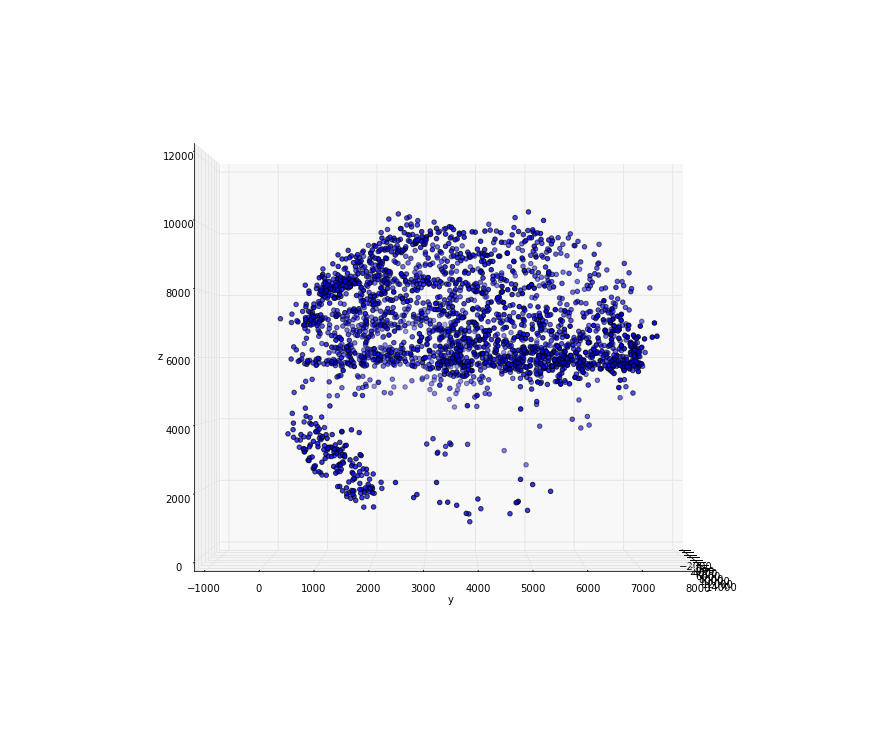

In [57]:
fig=plt.figure(figsize=(12,10))
ax=Axes3D(plt.gcf())
ax.scatter(arrayd[:,0],arrayd[:,1],arrayd[:,2])
ax.view_init(0,0)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [58]:
dist=[]
tmp=expid_to_inj_coord_int.values()
for i in tmp:
    for j in tmp:
        leng=np.sqrt(np.sum((i-j)**2))
        dist.append(leng)
        

In [59]:
dista=np.array(dist)

In [60]:
type(dist)

<type 'list'>

In [61]:
np.min(dista[np.where(dista!=0)])

10.0

In [62]:
for i in all_experiments_id_list:
    print i,expid_to_inj_coord[str(i)]

180435652 [7820, 4250, 9870]
180436360 [4800, 4720, 8980]
167902586 [2570, 3680, 5890]
166055636 [3080, 1970, 6130]
180719293 [3140, 3330, 7390]
180709942 [3360, 3120, 7520]
180917660 [5570, 4540, 9540]
174957972 [6120, 5150, 4540]
480074702 [9680, 3730, 5420]
158257355 [4440, 6130, 5460]
180916954 [4800, 1220, 5930]
100141780 [4070, 2600, 7500]
158258062 [7170, 6520, 5750]
166082128 [3420, 2870, 7290]
166153483 [3620, 4530, 7710]
158314987 [7950, 5670, 5280]
267959197 [7640, 3420, 5890]
180720175 [5710, 670, 6420]
478376197 [3220, 3090, 4980]
113144533 [7200, 5760, 8560]
114155190 [9560, 3800, 5460]
180717881 [4580, 3610, 8670]
165975096 [8400, 5200, 5200]
301267162 [3380, 2870, 7210]
313325371 [7390, 6520, 5740]
120814821 [3940, 2350, 6990]
181057754 [6520, 6890, 5730]
127084296 [4880, 1800, 6920]
112306316 [3000, 3600, 6690]
286482701 [4150, 2510, 5780]
478874530 [12380, 6900, 6590]
263106036 [2640, 3450, 5720]
181895006 [6330, 3650, 5910]
180709230 [2360, 3870, 7100]
114472145 [890

303708513 [6730, 6460, 5730]
264697714 [7520, 5670, 6750]
112826458 [11380, 5720, 6920]
480689656 [10060, 4810, 4440]
502074651 [7920, 700, 3570]
113096571 [9010, 2780, 5740]
113165340 [8500, 4030, 7460]
168663472 [7190, 5170, 6670]
174583904 [7860, 4240, 6030]
182226839 [9050, 3400, 9350]
146658170 [6070, 4180, 5880]
175740500 [6810, 3490, 5970]
292790567 [10230, 4230, 6790]
272781246 [2390, 3500, 5690]
522635991 [7690, 1340, 2500]
267929554 [7070, 4740, 6110]
278259822 [4760, 5250, 5400]
100140949 [7320, 980, 5830]
146470726 [4860, 5550, 5770]
159151138 [6150, 6860, 7530]
146858006 [8200, 2540, 9580]
538834292 [6890, 5110, 6310]
301209502 [6210, 3940, 5390]
127797441 [6780, 5320, 6400]
127651139 [8710, 4880, 5720]
175106053 [6470, 5590, 5460]
119846129 [10050, 3540, 7300]
515418047 [9760, 6110, 6440]
146078721 [8980, 2630, 6950]
114250546 [9370, 2270, 8990]
112229814 [5720, 1630, 7490]
296048512 [3820, 4200, 7880]
265712971 [4820, 2020, 5720]
287095785 [10070, 4610, 5620]
181890477 [

158315810 [5140, 6220, 6060]
264076081 [8160, 3990, 6990]
194947823 [9810, 4290, 8880]
301617370 [9280, 1730, 8890]
183282970 [7540, 2930, 7120]
294175704 [8050, 2960, 5830]
127223428 [9820, 5430, 6140]
297233422 [7850, 730, 7200]
272875132 [6250, 3830, 5610]
129567943 [11290, 4680, 6570]
312657373 [5890, 7100, 6090]
297948420 [4970, 2370, 8340]
306098703 [5200, 6950, 5700]
286727483 [5860, 6840, 5780]
502955689 [8840, 1450, 1950]
182933935 [8080, 2850, 8220]
300164356 [4580, 4190, 5840]
100141219 [8940, 1420, 7840]
508775240 [6820, 6390, 8090]
278257366 [5750, 1500, 7270]
293009265 [8160, 4700, 9940]
479670988 [7370, 3250, 3090]
177889243 [3270, 3390, 6050]
182804552 [10250, 5030, 6840]
303710632 [6650, 4590, 5780]
503018656 [9100, 1980, 2000]
175739085 [5540, 5170, 6260]
292480129 [7240, 5290, 5830]
127557915 [9010, 3960, 7020]
292623457 [6660, 3260, 5970]
158375425 [7240, 4230, 7460]
277957908 [4910, 1870, 7260]
504173156 [5100, 6780, 4740]
125437921 [11210, 6560, 5950]
272824561 [3

268038262 [5110, 1760, 6040]
113936696 [11220, 2050, 7550]
298796577 [4890, 2310, 8530]
529428776 [8250, 4070, 1390]
311845265 [8960, 3880, 5880]
485902743 [5690, 4800, 9360]
311922557 [5610, 6990, 6390]
477549362 [7440, 1400, 5440]
300167479 [5960, 6490, 5880]
287171983 [8000, 2250, 7310]
171019004 [6590, 2000, 7090]
266177248 [8830, 1440, 8970]
266816894 [3920, 3290, 5740]
159751184 [7260, 6810, 5900]
114045733 [7960, 5840, 5780]
160540013 [6490, 2870, 8120]
311983834 [5290, 7040, 5880]
287808449 [8880, 4650, 5770]
301735795 [7410, 3460, 8220]
301180385 [6530, 2740, 8380]
268041088 [9330, 3510, 9200]
114400640 [13090, 5130, 6030]
147708352 [11160, 2070, 6250]
293787288 [7440, 2670, 7700]
502592260 [8750, 1170, 3240]
182144176 [7550, 3650, 5460]
293820681 [7690, 2660, 10030]
182458849 [11700, 7330, 6620]
294435580 [7340, 1480, 8310]
521255975 [8320, 1680, 4870]
301063301 [8330, 4210, 7650]
397336241 [5830, 6960, 6410]
178486024 [5050, 3620, 6040]
305380411 [7680, 2130, 7940]
184212995

In [63]:
def removed_neighborhoodsingle(expid,epsilon,expid_to_inj_coord):
    """returns all experiments close to expid within to the epsilon
    
    """
    x=expid_to_inj_coord[expid]
    x1,x2,x3=np.array(x.strip(']').strip("[").split(",")).astype(int)
    
    N=[]
    test=[]
    for i in expid_to_inj_coord.keys():
        #bypass id col
        if i!='id':
            y1,y2,y3=np.array(expid_to_inj_coord[i].strip(']').strip("[").split(",")).astype(int)
            if np.sqrt((x1-y1)**2+(x2-y2)**2+(x3-y3)**2)<epsilon and np.sqrt((x1-y1)**2+(x2-y2)**2+(x3-y3)**2)>0.1:
                N.append(int(i))
            if np.sqrt((x1-y1)**2+(x2-y2)**2+(x3-y3)**2)<=0.1:
                test.append(i)
        else:
            #print("unwanted 'id' removed")
            pass
        
    return N

In [64]:
Neighborhood_itself={}

for i in all_experiments_id_list:
    Neighborhood_itself[i]=removed_neighborhoodsingle(str(i),200,expid_to_inj_coord)

In [65]:
Neighborhood_itself

{129564675: [114248377, 262188772, 302053755], 147136518: [183459175, 176432524, 127470976, 167025578, 301014055], 293470216: [267031577, 156786939], 298049545: [158315810], 182280207: [114155190, 168300027, 128055110], 299245589: [299404532], 146858006: [], 142655513: [547509190, 277799582, 158434409], 178282527: [159751184, 175738378], 179642401: [], 146986331: [], 265125894: [], 187269162: [294174996, 300641829], 126353451: [298230624], 286556208: [267540168, 182337561, 308641549], 301875208: [], 301580339: [520728084, 257636467], 124059700: [], 294314037: [152994878, 299446445], 157909001: [156786234], 122642490: [158138440, 277800995, 297669605, 181598954, 157826227], 182804552: [], 479756361: [479755622, 501711996], 277618762: [182224715], 277856332: [265945645], 485105742: [], 534175823: [], 307691605: [], 286302294: [], 167201465: [], 180568155: [167026321, 176897793, 176886238, 545428296], 305487964: [267813224, 477037203], 160153696: [], 278511717: [], 510582887: [536298009],

## expid to inj volume dictionary

In [67]:
import csv

In [68]:
expid_to_inj_volume={}
with open("projection_search_results2.txt",'rb') as f:
    abcd=csv.reader(f,delimiter=' ')
    for row in abcd:
        a,b=row[0].split()
        expid_to_inj_volume[int(a)]=b
        

In [69]:
len(expid_to_inj_volume)

2546

In [70]:
expid_to_inj_volume

{129564675: '0.001974', 147136518: '0.002512', 293470216: '0.340077', 298049545: '0.207825', 182280207: '0.174082', 299245589: '0.515037', 146858006: '0.114172', 142655513: '0.192249', 178282527: '0.082524', 179642401: '0.02383', 146986331: '0.013775', 265125894: '0.001472', 187269162: '0.244691', 126353451: '0.096978', 286556208: '0.186198', 301875208: '0.055706', 301580339: '0.067232', 124059700: '0.262989', 294314037: '0.188381', 157909001: '0.024158', 122642490: '0.151085', 182804552: '0.27562', 479756361: '0.163773', 277618762: '0.341612', 277856332: '0.031237', 485105742: '0.020778', 534175823: '0.001069', 307691605: '0.039377', 286302294: '0.212108', 167201465: '0.221849', 180568155: '0.00658', 305487964: '0.090369', 160153696: '0.483467', 278511717: '0.087502', 510582887: '0.023841', 283017324: '0.012808', 301539438: '0.136438', 267657327: '0.084597', 171409520: '0.003697', 302086846: '0.00588', 313327735: '0.086122', 309739641: '0.084078', 181600380: '0.051987', 278503555: '0.

## sum_projection between two regions 

In [71]:
help(mcc.get_structure_unionizes)

Help on method get_structure_unionizes in module allensdk.core.mouse_connectivity_cache:

get_structure_unionizes(self, experiment_ids, is_injection=None, structure_ids=None, include_descendants=False, hemisphere_ids=None) method of allensdk.core.mouse_connectivity_cache.MouseConnectivityCache instance
    Get structure unionizes for a set of experiment IDs.  Filter the results by injection status,
    structure, and hemisphere.
    
    Parameters
    ----------
    experiment_ids: list
        List of experiment IDs.  Corresponds to section_data_set_id in the API.
    
    is_injection: boolean
        If True, only return unionize records that disregard non-injection pixels.
        If False, only return unionize records that disregard injection pixels.
        If None, return all records.  Default None.
    
    structure_ids: list
        Only return unionize records for a specific set of structures.
        If None, return all records. Default None.
    
    include_descendants: 

In [72]:
'''
def sum_proj(inj,target,hemisphere=[2],bound_below=0.0,reciprocal=False,exception=[]):
    """returns projection results from injection into the target.
    
    args:
    inj (str): acronym of the injection site
    target (str): acronym of the target structures"""
    
    """"""
    #reciprocal
    if not reciprocal:
        pass
    elif reciprocal:
        save=inj
        inj=target
        target=save
    
    #get
    sinj=structure_tree.get_structures_by_acronym([inj])[0]
    starget=structure_tree.get_structures_by_acronym([target])[0]
    
    sinj_experiments=mcc.get_experiments(cre=None,
                                         injection_structure_ids=[sinj['id']])
    if len(sinj_experiments)==0:
        raise ValueError( 'No experiments exist for this structure')
    
    unionizes=mcc.get_structure_unionizes([ep['id'] for ep in sinj_experiments],
                                         is_injection=False,
                                         structure_ids=[starget['id']],
                                         include_descendants=False,
                                         hemisphere_ids=hemisphere)
    exception_count=0.0
    
    #try fetching the volume data for the injection structure
    try:
        sinj_structure_vol=float(id_to_volume[acronym_to_id[inj]])/2
    except:
        raise ValueError('Volume data does not exist for this structure')
    
    
    _error,__error,___error=0.0,0.0,0.0
    
    #projection sum
    proj_sum={}
    #
    tot_injection_volume_fraction=0.0
    
    #get unionized records of experiment id and projection volume
    expid=unionizes['experiment_id']
    projvol=unionizes['projection_volume']
    
    #set variable names
    expid=dict(expid)
    projvol=dict(projvol)
    
    #check their sizes are identical
    assert len(expid)==len(projvol)
    
    #make ditionary called projvolV where key= expid, value= projection volume
    #key = int, vol = float
    projvolV={}
    for i in range(len(expid)):
        projvolV[int(expid[i])]=float(projvol[i]
        
                                      
    #fetch neighbors of each experiment
    for ID in projvolV:
        neighbors=Neighborhood_itself[ID]
        print neighbors
    
    for key in projvolV:
        for neighbor in neighbors[key]:
            
    
    resolve_overlap(s1,s2,s1_expid,s2_expid,p1,p2,delta=0.000001)
    
    
    return projvolV

a=sum_proj('PB','NTS',hemisphere=[2],bound_below=0.0,reciprocal=False,exception=[])
        

'''
None

In [73]:
Neighborhood_itself

{129564675: [114248377, 262188772, 302053755], 147136518: [183459175, 176432524, 127470976, 167025578, 301014055], 293470216: [267031577, 156786939], 298049545: [158315810], 182280207: [114155190, 168300027, 128055110], 299245589: [299404532], 146858006: [], 142655513: [547509190, 277799582, 158434409], 178282527: [159751184, 175738378], 179642401: [], 146986331: [], 265125894: [], 187269162: [294174996, 300641829], 126353451: [298230624], 286556208: [267540168, 182337561, 308641549], 301875208: [], 301580339: [520728084, 257636467], 124059700: [], 294314037: [152994878, 299446445], 157909001: [156786234], 122642490: [158138440, 277800995, 297669605, 181598954, 157826227], 182804552: [], 479756361: [479755622, 501711996], 277618762: [182224715], 277856332: [265945645], 485105742: [], 534175823: [], 307691605: [], 286302294: [], 167201465: [], 180568155: [167026321, 176897793, 176886238, 545428296], 305487964: [267813224, 477037203], 160153696: [], 278511717: [], 510582887: [536298009],

In [74]:
expid_to_inj_coord

{'120814821': '[3940, 2350, 6990]', '301209502': '[6210, 3940, 5390]', '114045733': '[7960, 5840, 5780]', '305487964': '[3630, 1670, 7220]', '120493315': '[11340, 3710, 7170]', '187269162': '[6090, 6660, 7550]', '272697944': '[3920, 3290, 7660]', '266839784': '[11260, 4440, 7930]', '496576666': '[5230, 1390, 5050]', '297947641': '[4530, 1780, 6630]', '298795868': '[9160, 4080, 8890]', '156671933': '[7550, 990, 7070]', '183330908': '[6210, 5340, 9230]', '302014692': '[9630, 4420, 9040]', '293116943': '[9780, 1090, 8490]', '297892130': '[4340, 1380, 6410]', '502074651': '[7920, 700, 3570]', '272830456': '[6220, 3820, 5870]', '310439724': '[6170, 6310, 8740]', '479982715': '[8770, 1960, 2300]', '183071513': '[6810, 4360, 6390]', '166271142': '[7560, 770, 5840]', '309514434': '[5820, 1910, 9450]', '182090318': '[7570, 2710, 9720]', '286317619': '[7490, 2100, 6080]', '304675254': '[11400, 4460, 7950]', '113504763': '[6850, 5480, 5730]', '307137245': '[5140, 7150, 5740]', '506891241': '[9490

In [75]:
a

'310175667'

In [440]:
def resolve_overlap(s1,s2,s1_expid,s2_expid,p1,p2,delta=0.000001):

    #original
    p1o=p1
    p2o=p2

    s1_inj=mcc.get_injection_density(s1)[0]
    s2_inj=mcc.get_injection_density(s2)[0]

    #get common coordinates


    ls1=s1_inj>delta
    ls2=s2_inj>delta
    truth_array=ls1*ls2
    truth_array_coord=np.where(truth_array)

    #density coordinates
    s1dtot=np.sum(s1_inj)
    s2dtot=np.sum(s2_inj)

    s1d=np.sum(s1_inj[truth_array_coord])
    s2d=np.sum(s2_inj[truth_array_coord])

    #subtract overlap:
    p1=p1-p1o*(s1d/s1dtot)
    p2=p2-p2o*(s2d/s2dtot)

    #fraction
    s1r=s1d/s1dtot
    s2r=s2d/s2dtot

    #add verlap
    p1=p1+p1o*s1r*(s1d/(s1d+s2d))
    p2=p2+p2o*s2r*(s2d/(s1d+s2d))

    return p1,p2

In [76]:
def sum_proj(inj,target,hemisphere=[2],bound_below=0.0,reciprocal=False,exception=[]):
    """returns
    
    args:
    inj (str): acronmy of the injection site
    target (str): acronym of the target structures"""
    
    """"""
    #reciprocal
    if not reciprocal:
        pass
    elif reciprocal:
        save=inj
        inj=target
        target=save
    
    #1. get projection search results
    sinj=structure_tree.get_structures_by_acronym([inj])[0]
    starget=structure_tree.get_structures_by_acronym([target])[0]
    
    sinj_experiments=mcc.get_experiments(cre=None,
                                         injection_structure_ids=[sinj['id']])
    if len(sinj_experiments)==0:
        raise ValueError( 'No experiments exist for this structure')
    
    unionizes=mcc.get_structure_unionizes([ep['id'] for ep in sinj_experiments],
                                         is_injection=False,
                                         structure_ids=[starget['id']],
                                         include_descendants=False,
                                         hemisphere_ids=hemisphere)
    exception_count=0.0
    
    #2. using unionized records, get experiments id and its associated projection volume from sinj to starget
    a=unionizes['experiment_id']
    b=unionizes['projection_volume']
    
    
    #3. try fetching the volume data for the injection structure. return error otherwise
    try:
        sinj_structure_vol=float(id_to_volume[acronym_to_id[inj]])/2
    except:
        raise ValueError('Volume data does not exist for this structure')
    
    _error,__error,___error=0.0,0.0,0.0
    
    
    #initialize projection sum
    proj_sum=0.0
    tot_injection_volume_fraction=0.0
    
    for i in range(len(a)):
        p=i
        c1=float(b[p])
        c2=float(Master_injection_fraction_dictionary[a[p]][acronym_to_id[inj]])
        proj_sum+=c1*c2
    return proj_sum
    """
    for i in range(len(a)):
        p=i
        
        if float(expid_to_inj_volume[a[p]])>=0.2 and float(expid_to_inj_volume[a[p]])<=0.4 :
            
            #proj sum = proj volume * fraction of the sinj region
            c1=float(b[p])
            c2=float(Master_injection_fraction_dictionary[a[p]][acronym_to_id[inj]])
            proj_sum+=c1*c2
            _error+=c1*c2*np.sqrt( (0.10)**2 + (0.02)**2)

            #tot inj_vol_fraction= injection volume of exp * fraction of the sinj region
            c3=float(expid_to_inj_volume[a[p]])
            c4=float(Master_injection_fraction_dictionary[a[p]][acronym_to_id[inj]])
            tot_injection_volume_fraction+=c3*c4
            __error+=c3*c4*np.sqrt((0.05)**2 + (0.02)**2)
        else:
            pass
    if tot_injection_volume_fraction>=sinj_structure_vol:
        proj_sum=proj_sum*sinj_structure_vol/tot_injection_volume_fraction
        ___error=(proj_sum*sinj_structure_vol/tot_injection_volume_fraction)*np.sqrt((0.10)**2+(__error/tot_injection_volume_fraction)**2+(_error/proj_sum)**2)
        return proj_sum,___error,exception,exception_count
    
    elif tot_injection_volume_fraction<=sinj_structure_vol:
        try:
            proj_sum=proj_sum*tot_injection_volume_fraction/sinj_structure_vol
            ___error=(proj_sum*sinj_structure_vol/tot_injection_volume_fraction)*np.sqrt((0.10)**2+(__error/tot_injection_volume_fraction)**2+(_error/proj_sum)**2)
            return proj_sum,___error,exception,exception_count
        
        except ZeroDivisionError:
            return 0,0,0,0
    """


In [107]:
Unpack(acronym_to_id['BS'],MST,include_self=True)

[343, 313, 323, 35, 66, 115, 128, 214, 231, 246, 294, 10, 494, 503, 511, 17, 26, 42, 381, 616, 749, 757, 795, 50, 67, 587, 975, 1100, 215, 531, 628, 634, 1061, 706, 339, 4, 811, 820, 828, 271, 302, 834, 842, 851, 460, 874, 580, 348, 165, 12, 100, 197, 591, 872, 374, 1052, 1065, 354, 370, 83, 106, 135, 143, 939, 136, 154, 169, 177, 203, 235, 955, 963, 307, 372, 395, 1098, 1107, 653, 661, 701, 202, 209, 217, 225, 765, 773, 781, 839, 852, 859, 938, 970, 978, 1048, 1069, 576, 379, 206, 222, 230, 386, 207, 429, 437, 445, 45, 53, 61, 69, 77, 607, 96, 101, 112, 560, 642, 651, 666, 674, 682, 691, 720, 711, 1039, 903, 771, 987, 280, 318, 534, 574, 621, 880, 898, 931, 1093, 1117, 146, 162, 238, 350, 358, 604, 679, 130, 137, 147, 1132, 7, 398, 105, 114, 122, 612, 82, 90, 99, 867, 123, 881, 860, 868, 875, 883, 891, 890, 899, 915, 1129, 549, 856, 51, 189, 575, 599, 907, 930, 138, 218, 325, 1020, 1029, 239, 64, 127, 1096, 1104, 155, 255, 1113, 1120, 262, 444, 59, 362, 617, 626, 636, 366, 1077, 571, 

## Connectivity - Damasio

In [204]:
Damasio_list_infoflow={}
ward_list_infoflow={}

THunpacked=Unpack(acronym_to_id['TH'],MST)

wardlist=[]
for i in THunpacked:
    wardlist.append(id_to_acronym[i])

In [205]:
Damasio_list=['SCs','PAG','SCm','HY','PAG','PB','NTS','TH']
wardlist=wardlist+['BS','AI','ACA','DORsm','DORpm','RT','ILM','VENT,']



In [190]:
for i in Damasio_list:
    Damasio_list_infoflow[i]={}

for i in Damasio_list:
    for j in Damasio_list:
        if i!=j:
            Damasio_list_infoflow[i][j]=sum_proj(i,j,hemisphere=[2],reciprocal=False)*92000

In [206]:
for i in wardlist:
    ward_list_infoflow[i]={}

for i in wardlist:
    for j in wardlist:
        if i!=j:
            try:
                ward_list_infoflow[i][j]=sum_proj(i,j,hemisphere=[2],reciprocal=False)*92000
            except:
                pass

In [192]:
Damasio_array=np.zeros([7,7])
for a,i in enumerate(Damasio_list_infoflow):
    for b,j in enumerate(Damasio_list_infoflow):
        if i!=j:
            Damasio_array[a][b]=Damasio_list_infoflow[i][j]


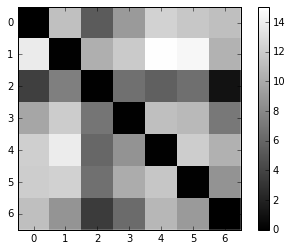

In [193]:
plt.imshow(np.log1p(Damasio_array),cmap='gray',interpolation='None')
plt.colorbar()
plt.show()

In [200]:
ward_list_infoflow

{1088: {}, 'ACA': {'RT': 90376.17776329529, 'ILM': 78581.71327295614, 'AI': 40499.531153287775, 'DORpm': 783928.8839258517, 'DORsm': 134146.30354281885, 'BS': 3473115.3525175713}, 1029: {}, 262: {}, 321: {}, 138: {}, 907: {}, 15: {}, 'DORsm': {'RT': 91173.23718263145, 'ACA': 57806.679300326374, 'ILM': 24616.802423195546, 'AI': 60532.74952407844, 'DORpm': 225365.83669450795, 'BS': 814910.3046100739}, 1044: {}, 149: {}, 406: {}, 'BS': {'RT': 877106.2270005378, 'ACA': 2196447.4316541958, 'ILM': 784028.0389925769, 'AI': 1704412.5130018054, 'DORpm': 6309404.318181995, 'DORsm': 2139033.270069418}, 155: {}, 414: {}, 709: {}, 'RT': {'ACA': 3249.929605966589, 'ILM': 56657.173675158476, 'AI': 1975.1933964934312, 'DORpm': 235609.3167560829, 'DORsm': 170671.61243975998, 'BS': 509621.8868376765}, 636: {}, 930: {}, 27: {}, 422: {}, 170: {}, 685: {}, 1072: {}, 'AI': {'RT': 8108.895754307764, 'ACA': 81512.05264874076, 'ILM': 15958.446531015272, 'DORpm': 83698.19610556138, 'DORsm': 31987.546366246872, 

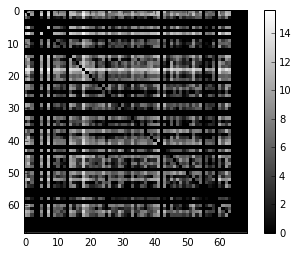

In [207]:
ward_array=np.zeros([69,69])
for a,i in enumerate(ward_list_infoflow):
    for b,j in enumerate(ward_list_infoflow):
        if i!=j:
            try:
                ward_array[a][b]=ward_list_infoflow[i][j]
            except:
                None
plt.imshow(np.log1p(ward_array),cmap='gray',interpolation='None')
plt.colorbar()
plt.show()

In [214]:
%pprint

Pretty printing has been turned ON


In [232]:
for a,i in enumerate(wardlist):
    if a%2==1:
        print(str(a)+": "+acronym_to_name[i])

1: Intralaminar nuclei of the dorsal thalamus
3: Central lateral nucleus of the thalamus
5: Paracentral nucleus
7: Lateral group of the dorsal thalamus
9: Suprageniculate nucleus
11: Posterior limiting nucleus of the thalamus
13: Anterodorsal nucleus
15: Anteromedial nucleus, dorsal part
17: Lateral dorsal nucleus of thalamus
19: Interanterodorsal nucleus of the thalamus
21: Reticular nucleus of the thalamus
23: Intermediodorsal nucleus of the thalamus
25: Mediodorsal nucleus of the thalamus, central part
27: Mediodorsal nucleus of the thalamus, medial part
29: Perireunensis nucleus
31: Parataenial nucleus
33: Nucleus of reuniens
35: Lateral habenula
37: Geniculate group, ventral thalamus
39: Ventral part of the lateral geniculate complex
41: Thalamus, sensory-motor cortex related
43: Subparafascicular nucleus, magnocellular part
45: Subparafascicular area
47: Ventral anterior-lateral complex of the thalamus
49: Ventral posterior complex of the thalamus
51: Ventral posterolateral nucle

In [233]:
for a,i in enumerate(wardlist):
    if a%2==0:
        try:
            print(str(a)+": "+acronym_to_name[i])
        except:
            None

0: Thalamus, polymodal association cortex related
2: Rhomboid nucleus
4: Central medial nucleus of the thalamus
6: Parafascicular nucleus
8: Lateral posterior nucleus of the thalamus
10: Posterior complex of the thalamus
12: Anterior group of the dorsal thalamus
14: Anteromedial nucleus
16: Anteromedial nucleus, ventral part
18: Anteroventral nucleus of thalamus
20: Interanteromedial nucleus of the thalamus
22: Medial group of the dorsal thalamus
24: Mediodorsal nucleus of thalamus
26: Mediodorsal nucleus of the thalamus, lateral part
28: Submedial nucleus of the thalamus
30: Midline group of the dorsal thalamus
32: Paraventricular nucleus of the thalamus
34: Epithalamus
36: Medial habenula
38: Intergeniculate leaflet of the lateral geniculate complex
40: Subgeniculate nucleus
42: Subparafascicular nucleus
44: Subparafascicular nucleus, parvicellular part
46: Ventral group of the dorsal thalamus
48: Ventral medial nucleus of the thalamus
50: Ventral posterolateral nucleus of the thalam

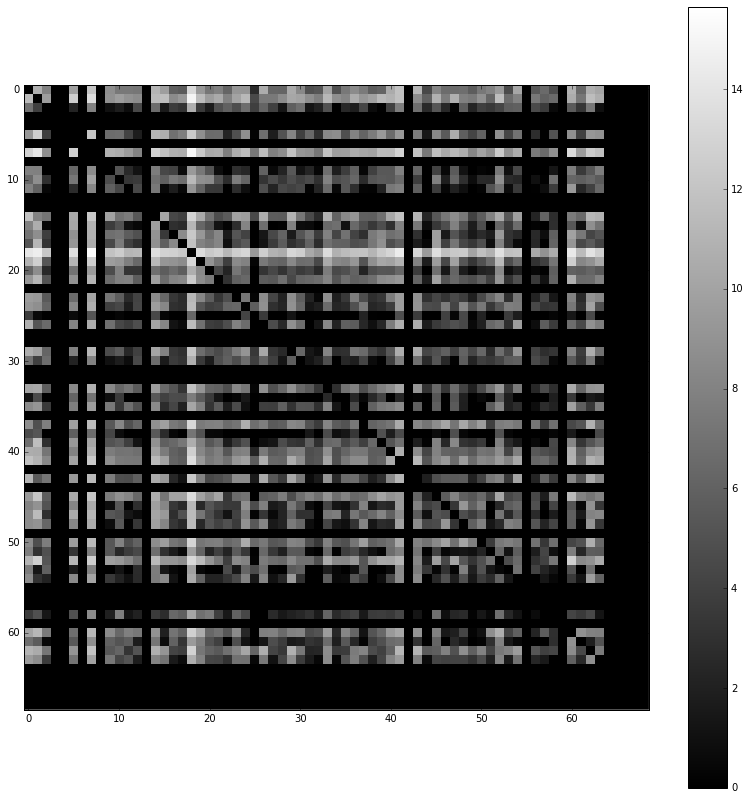

In [211]:
plt.figure(figsize=[14,14])
plt.imshow(np.log1p(ward_array),cmap='gray',interpolation='None')
plt.colorbar()
plt.show()

In [77]:
result=sum_proj('DORsm','BS',hemisphere=[2],reciprocal=False)
result*92000

814910.3046100739

In [78]:
result=sum_proj('BS','DORsm',hemisphere=[2],reciprocal=False)
result*92000

2139033.270069418

In [79]:
result=sum_proj('BS','DORpm',hemisphere=[2],reciprocal=False)
result*92000

6309404.318181995

In [80]:
result=sum_proj('DORpm','BS',hemisphere=[2],reciprocal=False)
result*92000

4148499.640616909

In [81]:
result=sum_proj('RT','BS',hemisphere=[2],reciprocal=False)
result*92000

509621.8868376765

In [82]:
result=sum_proj('BS','RT',hemisphere=[2],reciprocal=False)
result*92000

877106.2270005378

In [83]:
result=sum_proj('RT','CTX',hemisphere=[2],reciprocal=False)
result*92000

78530.12543272904

In [84]:
result=sum_proj('CTX','RT',hemisphere=[2],reciprocal=False)
result*92000

974850.9358512737

In [75]:
result=sum_proj('BS','TH',hemisphere=[2],reciprocal=False)
result*92000

11556262.806167578

In [77]:
result=sum_proj('TH','BS',hemisphere=[2],reciprocal=False)
result*92000

6548341.517959961

In [76]:
result=sum_proj('BS','AI',hemisphere=[2],reciprocal=False)
result*92000

1704412.5130018054

In [80]:
result=sum_proj('AI','BS',hemisphere=[2],reciprocal=False)
result*92000

356512.5415178483

In [81]:
result=sum_proj('BS','ACA',hemisphere=[2],reciprocal=False)
result*92000

2196447.4316541958

In [82]:
result=sum_proj('ACA','BS',hemisphere=[2],reciprocal=False)
result*92000

3473115.3525175713

In [83]:
result=sum_proj('TH','CTX',hemisphere=[2],reciprocal=False)
result*92000

20240026.833273046

In [84]:
result=sum_proj('CTX','TH',hemisphere=[2],reciprocal=False)
result*92000

13726423.340207223

In [85]:
result=sum_proj('BS','CTX',hemisphere=[2],reciprocal=False)
result*92000

32525463.73011104

In [86]:
result=sum_proj('CTX','BS',hemisphere=[2],reciprocal=False)
result*92000

35466739.825538404

In [108]:
result=sum_proj('SCm','CTX',hemisphere=[2],reciprocal=False)
result*92000

67011.3575412337

In [109]:
result=sum_proj('CTX','SCm',hemisphere=[2],reciprocal=False)
result*92000

3229214.5600067745

In [110]:
result=sum_proj('PAG','SCm',hemisphere=[2],reciprocal=False)
result*92000

172453.28705805595

In [111]:
result=sum_proj('SCm','PAG',hemisphere=[2],reciprocal=False)
result*92000

128937.85615570615

Mouse Neuron Density:92000

In [94]:
result=sum_proj('SCs','TH',hemisphere=[2],reciprocal=False)
result*92000

51983.0789544786

In [95]:
result=sum_proj('TH','SCs',hemisphere=[2],reciprocal=False)
result*92000

36697.7307013086

In [89]:
acronym_to_name['MG']

u'Medial geniculate complex'

# IC, MB

In [377]:
a,b,c,d=sum_proj('IC','MG',hemisphere=[2],reciprocal=False)
a,b

(0.2189620332548821, 0.053232348571171324)

In [378]:
a,b,c,d=sum_proj('IC','MG',hemisphere=[2],reciprocal=True)
a,b

(0, 0)

In [849]:
a,b,c,d=sum_proj('MG','AUD',hemisphere=[2],reciprocal=True)
a,b

(0.3122445817062549, 0.034784195293372865)

In [850]:
a,b,c,d=sum_proj('MG','AUD',hemisphere=[2],reciprocal=False)
a,b

(0.3808066140143173, 0.097699795380176965)

# CTX,TH

In [853]:
a,b,c,d=sum_proj('VIS','TH',hemisphere=[2],reciprocal=False)
a,b

(3.489620274269559, 0.35823704169809667)

In [854]:
a,b,c,d=sum_proj('AUD','TH',hemisphere=[2],reciprocal=False)
a,b

(1.1247610155393086, 0.1252989134642459)

In [855]:
a,b,c,d=sum_proj('SSp','TH',hemisphere=[2],reciprocal=False)
a,b

(7.597831872179274, 0.82612278761274516)

In [856]:
a,b,c,d=sum_proj('SSs','TH',hemisphere=[2],reciprocal=False)
a,b

(3.0333339903932486, 0.36370595960249946)

In [857]:
a,b,c,d=sum_proj('SS','TH',hemisphere=[2],reciprocal=False)
a,b

(10.559532395184947, 1.1563560365860903)

In [860]:
a,b,c,d=sum_proj('MB','TH',hemisphere=[2],reciprocal=False)
a,b

(8.308904004053081, 0.89369167613409861)

In [863]:
id_to_volume[8]

245.48400000000001

##  Between two large structures (Don't use)

substructures do not completely span the superstructure and etc.

In [474]:
king=[]
ab=Unpack(acronym_to_id['SCs'],MST)
king

[]

In [475]:

def Two_Master_proj_sum(source,target):
    """
    source (string) : target
    target (string) : source
    """
    target_unpacked=Unpack(acronym_to_id[target],MST)
    proj_sum=0.0
    
    for j in target_unpacked:
        proj_sum+=sum_proj(source,id_to_acronym[j],hemisphere=[2])
    
    
    return proj_sum

In [490]:
Two_Master_proj_sum('HB','SCm')


3.7716306928231567

In [497]:
ab=Unpack(acronym_to_id['SCm'],MST)
ab

[494, 503, 511, 17, 26, 42]

In [489]:
sum_proj('HB','SCm')

10.293231614685137

In [495]:
acronym_to_volume[acronym_to_id['SCm']]

3.50501

In [503]:
abc=0
for i in ab:
    abc+=acronym_to_volume[i]
abc

2.3552945999999997

In [494]:
acronym_to_volume

{1: 0.0067806200000000002,
 2: 0.0619462,
 4: 2.8243999999999998,
 7: 0.098217700000000005,
 8: 245.48400000000001,
 9: 0.128555,
 10: 1.49081,
 12: 0.018894600000000001,
 15: 0.148206,
 17: 1.15465,
 19: 0.013548599999999999,
 22: 1.3548200000000001,
 23: 0.32003799999999999,
 26: 0.67182399999999998,
 27: 0.039086900000000001,
 30: 0.0067406799999999998,
 31: 3.0419400000000003,
 33: 0.60682199999999997,
 35: 0.019541800000000002,
 36: 0.108127,
 38: 0.138125,
 39: 1.73512,
 41: 0.16181900000000002,
 42: 0.18772900000000001,
 44: 0.46916800000000003,
 48: 1.30681,
 50: 0.045331499999999997,
 51: 0.63146099999999994,
 56: 2.2686000000000002,
 59: 0.080298399999999992,
 63: 0.025758799999999995,
 64: 0.087038000000000004,
 66: 0.00323033,
 67: 0.030199700000000003,
 68: 0.14141700000000001,
 72: 0.018684099999999999,
 74: 0.11648399999999999,
 83: 0.28560200000000002,
 84: 0.25948199999999999,
 88: 0.43145699999999998,
 91: 0.474999,
 95: 4.5018900000000004,
 96: 0.324264,
 97: 0.00331

## Apply to all structures in a list

In [478]:
def Master_proj_sum(arg):
    
    for i in arg:
        if i not in acronym_list:
            raise ValueError(i,' is not a proper structure acronym')
    
    super_dict={}
    subdict={}
    for i in arg:
        subdict={}
        for j in arg:
            if j!=i:
                subdict[j]=sum_proj(i,j,hemisphere=[2])
        super_dict[i]=subdict
    return super_dict

In [488]:
Master_proj_sum(['AIp','SCs','SCm'])

{'AIp': {'SCm': 0.018756536845315006, 'SCs': 0.0016467369040000001},
 'SCm': {'AIp': 0.0062563099399829628, 'SCs': 4.0425433660011016},
 'SCs': {'AIp': 0.00097071277307000004, 'SCm': 2.8418220238123006}}

In [480]:
st_list=['NTS','PB','AP','HY','SCs','SCm','PAG','AId','AIv','AIp','SSp-n','SSp-bfd','SSp-ll','SSp-m','SSp-ul','SSp-tr','SSp-un','SSs']

In [119]:
result=all_proj_sum(st_list)

In [120]:
result

{'AId': {'AIp': 3.5119174487209972,
  'AIv': 3.5934695280299986,
  'AP': 7.3305992000000011e-06,
  'HY': 0.62044654100943342,
  'NTS': 0.0039574627349999994,
  'PAG': 0.052414859467092588,
  'PB': 0.034440660349370003,
  'SCm': 0.072119850678909983,
  'SCs': 0.0029798377924500001,
  'SSp-bfd': 0.33208335016221296,
  'SSp-ll': 0.33165242728076327,
  'SSp-m': 3.5850660134658896,
  'SSp-n': 0.40824899543002002,
  'SSp-tr': 0.15507226731086096,
  'SSp-ul': 0.69187981204938942,
  'SSp-un': 0.14436196369319995,
  'SSs': 3.4150179624612398},
 'AIp': {'AId': 1.1478443858247998,
  'AIv': 0.73886200931041024,
  'AP': 2.1617226199999999e-06,
  'HY': 0.38094963776633262,
  'NTS': 0.0026346847310000001,
  'PAG': 0.023922260805831767,
  'PB': 0.013175678394649998,
  'SCm': 0.018756536845315006,
  'SCs': 0.0016467369040000001,
  'SSp-bfd': 0.034188969141265693,
  'SSp-ll': 0.012347595583406999,
  'SSp-m': 0.30313423639049991,
  'SSp-n': 0.052097005909999994,
  'SSp-tr': 0.0072379834586000008,
  'SSp-

In [ ]:
result1=all_proj_sum(acronym_list)

In [757]:
for i in result:
    print(i)

SCm
SSp-ll
HY
SSp-ul
SSp-un
NTS
AIv
AIp
SSs
SSp-m
PB
AP
SSp-n
PAG
SSp-tr
AId
SSp-bfd
SCs


In [775]:
for i in result:
    for j in result[i]:
        print"Information from", i ,' to ', j ,'  =      ',result[i][j] 

Information from SCm  to  SSp-ll   =       486.536141295
Information from SCm  to  HY   =       425610.677134
Information from SCm  to  SSp-ul   =       1075.09372899
Information from SCm  to  SSp-un   =       371.236291943
Information from SCm  to  NTS   =       471.647207728
Information from SCm  to  AIv   =       413.498487885
Information from SCm  to  AIp   =       575.580514478
Information from SCm  to  SSs   =       5034.9662149
Information from SCm  to  SSp-m   =       4191.25236742
Information from SCm  to  PB   =       15348.3231179
Information from SCm  to  AP   =       2.39082153796
Information from SCm  to  SSp-n   =       3204.16504245
Information from SCm  to  PAG   =       236353.878351
Information from SCm  to  SSp-tr   =       263.285467541
Information from SCm  to  AId   =       1945.81970613
Information from SCm  to  SSp-bfd   =       4398.5786657
Information from SCm  to  SCs   =       321246.349966
Information from SSp-ll  to  SCm   =       269679.651335
Informatio

In [115]:
for i in st_list:
    print i," :     ",acronym_to_name[i]
        

NTS  :      Nucleus of the solitary tract
PB  :      Parabrachial nucleus
AP  :      Area postrema
HY  :      Hypothalamus
SCs  :      Superior colliculus, sensory related
SCm  :      Superior colliculus, motor related
PAG  :      Periaqueductal gray
AId  :      Agranular insular area, dorsal part
AIv  :      Agranular insular area, ventral part
AIp  :      Agranular insular area, posterior part
SSp-n  :      Primary somatosensory area, nose
SSp-bfd  :      Primary somatosensory area, barrel field
SSp-ll  :      Primary somatosensory area, lower limb
SSp-m  :      Primary somatosensory area, mouth
SSp-ul  :      Primary somatosensory area, upper limb
SSp-tr  :      Primary somatosensory area, trunk
SSp-un  :      Primary somatosensory area, unassigned
SSs  :      Supplemental somatosensory area


In [362]:
dense_unionizes=structure_unionizes[structure_unionizes.projection_density>.0]
large_unionizes=dense_unionizes[dense_unionizes.volume>0.0]
large_structures=pd.DataFrame(structure_tree.node(large_unionizes.structure_id))

print_full(large_structures.name)

0    Parabrachial nucleus
1    Parabrachial nucleus
2    Parabrachial nucleus
3    Parabrachial nucleus
Name: name, dtype: object


In [363]:
help(mcc.get_structure_unionizes)

Help on method get_structure_unionizes in module allensdk.core.mouse_connectivity_cache:

get_structure_unionizes(self, experiment_ids, is_injection=None, structure_ids=None, include_descendants=False, hemisphere_ids=None) method of allensdk.core.mouse_connectivity_cache.MouseConnectivityCache instance
    Get structure unionizes for a set of experiment IDs.  Filter the results by injection status,
    structure, and hemisphere.
    
    Parameters
    ----------
    experiment_ids: list
        List of experiment IDs.  Corresponds to section_data_set_id in the API.
    
    is_injection: boolean
        If True, only return unionize records that disregard non-injection pixels.
        If False, only return unionize records that disregard injection pixels.
        If None, return all records.  Default None.
    
    structure_ids: list
        Only return unionize records for a specific set of structures.
        If None, return all records. Default None.
    
    include_descendants: 

In [365]:
dense_unionizes=structure_unionizes[structure_unionizes.projection_density>.000]
large_unionizes=dense_unionizes[dense_unionizes.volume>.0001]
large_structures=pd.DataFrame(structure_tree.node(large_unionizes.structure_id))

large_structures


,acronym,color_hex_triplet,graph_id,graph_order,id,name,structure_id_path,structure_set_ids
0,PB,"[255, 174, 111]",1,874,867,Parabrachial nucleus,"[997, 8, 343, 1065, 771, 1132, 867]","[112905828, 10, 12, 184527634, 167587189, 1129..."
1,PB,"[255, 174, 111]",1,874,867,Parabrachial nucleus,"[997, 8, 343, 1065, 771, 1132, 867]","[112905828, 10, 12, 184527634, 167587189, 1129..."
2,PB,"[255, 174, 111]",1,874,867,Parabrachial nucleus,"[997, 8, 343, 1065, 771, 1132, 867]","[112905828, 10, 12, 184527634, 167587189, 1129..."
3,PB,"[255, 174, 111]",1,874,867,Parabrachial nucleus,"[997, 8, 343, 1065, 771, 1132, 867]","[112905828, 10, 12, 184527634, 167587189, 1129..."


meeting: find out any information about the proportionality between mouse and human brain

In [42]:
list1=[]
for i in acronym_list:
    list1.append(sum_proj(i,'SCs'))

In [43]:
list1

[0.18241764000000005,
 1.2743091646999993,
 0.0093812005790000017,
 73.005323734547261,
 'No_inj_site',
 0.034070246248000008,
 'No_inj_site',
 0.42157153334190023,
 0.00046931099000000002,
 'No_inj_site',
 0.50095567919593953,
 0.0017563451700000003,
 0.11201952681714399,
 0.29371545709840013,
 0.128282667518026,
 0.20724022209754012,
 0.033710363039470004,
 0.013712646141999994,
 0.0036096437600000009,
 'No_inj_site',
 0.002065173655,
 'No_inj_site',
 0.23997460424500003,
 0.088947211462549969,
 0.029192833433160016,
 0.022914707230330015,
 0.0034272693497999999,
 0.051732207948200021,
 0.0038600342637999997,
 0.013637615507859998,
 'No_inj_site',
 0.0053762104160000003,
 'No_inj_site',
 'No_inj_site',
 0.0039008813064699984,
 0.0019990372370000003,
 0.022311738168999999,
 1.1550720986100003,
 0.011063513559899998,
 'No_inj_site',
 'No_inj_site',
 0.013763659811560001,
 0.24440704394614005,
 0.18476721732320003,
 0.077533930040000046,
 0.0097058051121200004,
 0.0037880670120000004,
 

In [44]:
sum=0
for i in list1:
    if i!='No_inj_site':
        sum+=i
sum

504.34915131329223

In [505]:
acronym_to_volume[acronym_to_id['']]

0.27434899999999995

In [531]:
o=acronym_to_id['AP']

In [532]:
abp=annt==o

In [533]:
pp=np.where(abp)

In [534]:
len(pp[0])*(25*10**-3)**3

0.04520312500000001

In [535]:
acronym_to_volume[o]

0.025133700000000002